Importing Libraries:
pandas:Used for handling datasets (CSV files) and data manipulation.
numpy: Provides numerical operations, such as calculating the square root.
scikit-learn (sklearn):
train_test_split: To split data into training and test sets (though it's not used here).
LinearRegression: For training the linear regression model.
r2_score: Used to evaluate the performance of the model.
micromlgen: A library that converts machine learning models into C code for deployment on microcontrollers

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  r2_score
from micromlgen import port
import matplotlib.pyplot as plt

In [2]:
#Load train dataset
df=pd.read_csv("rain_dataset.csv")


NameError: name 'pd' is not defined

In [7]:
#display first 10 rows to inspect data
df.head(10)


,Humidity,Temperature,LDR,Rain
0,20,5,100,12
1,20,5,500,10
2,20,5,1000,8
3,20,5,1500,6
4,20,5,2000,4
5,20,5,2500,2
6,20,5,3000,1
7,20,5,3500,0
8,60,5,100,25
9,60,5,500,20


In [4]:
#Display names of column
print(df.columns)


NameError: name 'df' is not defined

In [11]:
# Strip leading and trailing spaces from column names
df.columns = df.columns.str.strip()

In [13]:
print(df.columns)

Index(['Humidity', 'Temperature', 'LDR', 'Rain'], dtype='object')


In [15]:
# Prepare feature and target variables for training
X_train = df[["Humidity", "Temperature", "LDR"]]  # Adjust column names if needed
y_train = df["Rain"]

In [17]:
#Train the linear regression model
model = LinearRegression()

In [19]:
## This trains the model and stores the trained model in 'final'
final=model.fit(X_train, y_train)

In [26]:
#convert the trained model (final) into C code for deployment on microcontrollers.
print(port(final))

#pragma once
#include <cstdarg>
namespace Eloquent {
    namespace ML {
        namespace Port {
            class LinearRegression {
                public:
                    /**
                    * Predict class for features vector
                    */
                    float predict(float *x) {
                        return dot(x, 0.430777027027, 0.873282828283, -0.007835404618) + -1.2202420028001768;
                    }

                protected:
                    /**
                    * Compute dot product
                    */
                    float dot(float *x, ...) {
                        va_list w;
                        va_start(w, 3);
                        float dot = 0.0;

                        for (uint16_t i = 0; i < 3; i++) {
                            const float wi = va_arg(w, double);
                            dot += x[i] * wi;
                        }

                        return dot;
                    }
                };
       

In [21]:
# Load the test dataset
test_df = pd.read_csv("test_dataset.csv")

# Prepare feature and target variables from the test dataset
test_df.columns = test_df.columns.str.strip()  # Strip extra spaces from column names
X_test = test_df[["Humidity", "Temperature", "LDR"]]  # Adjust column names if needed
y_test = test_df["Rain"]


In [23]:
# Make predictions on the test dataset
y_pred = model.predict(X_test)

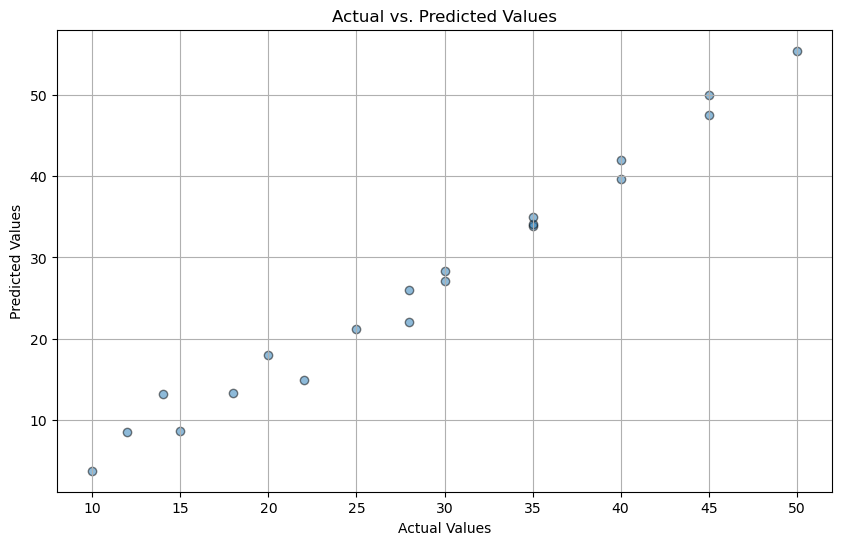

In [29]:
# Scatter plot of predicted vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, edgecolors='k')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

In [31]:
# Calculate and print metrics

r2 = r2_score(y_test, y_pred)

print("R^2 Score:", r2)

R^2 Score: 0.8888152030898261
